<a href="https://colab.research.google.com/github/navneetsinghsingh/IIS2MDC/blob/master/part_A_Flight_price_prediction_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow
print(tensorflow.__version__)






2.18.0


In [15]:


df = pd.read_excel("/content/Data (2).xlsx")  # Use read_excel() for Excel files

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# New Section

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [18]:
df.shape

(10682, 11)

In [19]:
df.describe()

,Price
count,10682.000000
mean,9087.527242
std,4611.326569
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [20]:
# Check for missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing values
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})

# Display only columns with missing values
print(missing_df[missing_df["Missing Values"] > 0])

# Fill missing values with mode
df["Route"].fillna(df["Route"].mode()[0], inplace=True)
df["Total_Stops"].fillna(df["Total_Stops"].mode()[0], inplace=True)





             Missing Values  Percentage
Route                     1    0.009362
Total_Stops               1    0.009362


<ipython-input-20-beceae8c1787>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Route"].fillna(df["Route"].mode()[0], inplace=True)
<ipython-input-20-beceae8c1787>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [21]:
# Ensure 'Date_of_Journey' exists
if "Date_of_Journey" in df.columns:
    df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"]).dt.day
    df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month
    df.drop("Date_of_Journey", axis=1, inplace=True)  # Drop original column
else:
    print("Column 'Date_of_Journey' not found in dataset.")


<ipython-input-21-12a2fddb4997>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"]).dt.day
<ipython-input-21-12a2fddb4997>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month


In [23]:
# Ensure 'Dep_Time' exists
if "Dep_Time" in df.columns:
    df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
    df["Dep_Minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute
    df.drop("Dep_Time", axis=1, inplace=True)  # Drop original column
else:
    print("Column 'Dep_Time' not found in dataset.")


<ipython-input-23-6066345044f0>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
<ipython-input-23-6066345044f0>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute


In [24]:
# Ensure 'Arrival_Time' exists
if "Arrival_Time" in df.columns:
    df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
    df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
    df.drop("Arrival_Time", axis=1, inplace=True)  # Drop original column
else:
    print("Column 'Arrival_Time' not found in dataset.")


<ipython-input-24-70b05f1969b4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
<ipython-input-24-70b05f1969b4>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [26]:
# Ensure 'Duration' exists
if "Duration" in df.columns:
    def convert_to_minutes(duration):
        hours, minutes = 0, 0
        if "h" in duration:
            hours = int(duration.split("h")[0].strip()) * 60
        if "m" in duration:
            minutes = int(duration.split("m")[0].split()[-1].strip())
        return hours + minutes

    df["Total_Duration"] = df["Duration"].apply(convert_to_minutes)
    df.drop("Duration", axis=1, inplace=True)  # Drop original column
else:
    print("Column 'Duration' not found in dataset.")


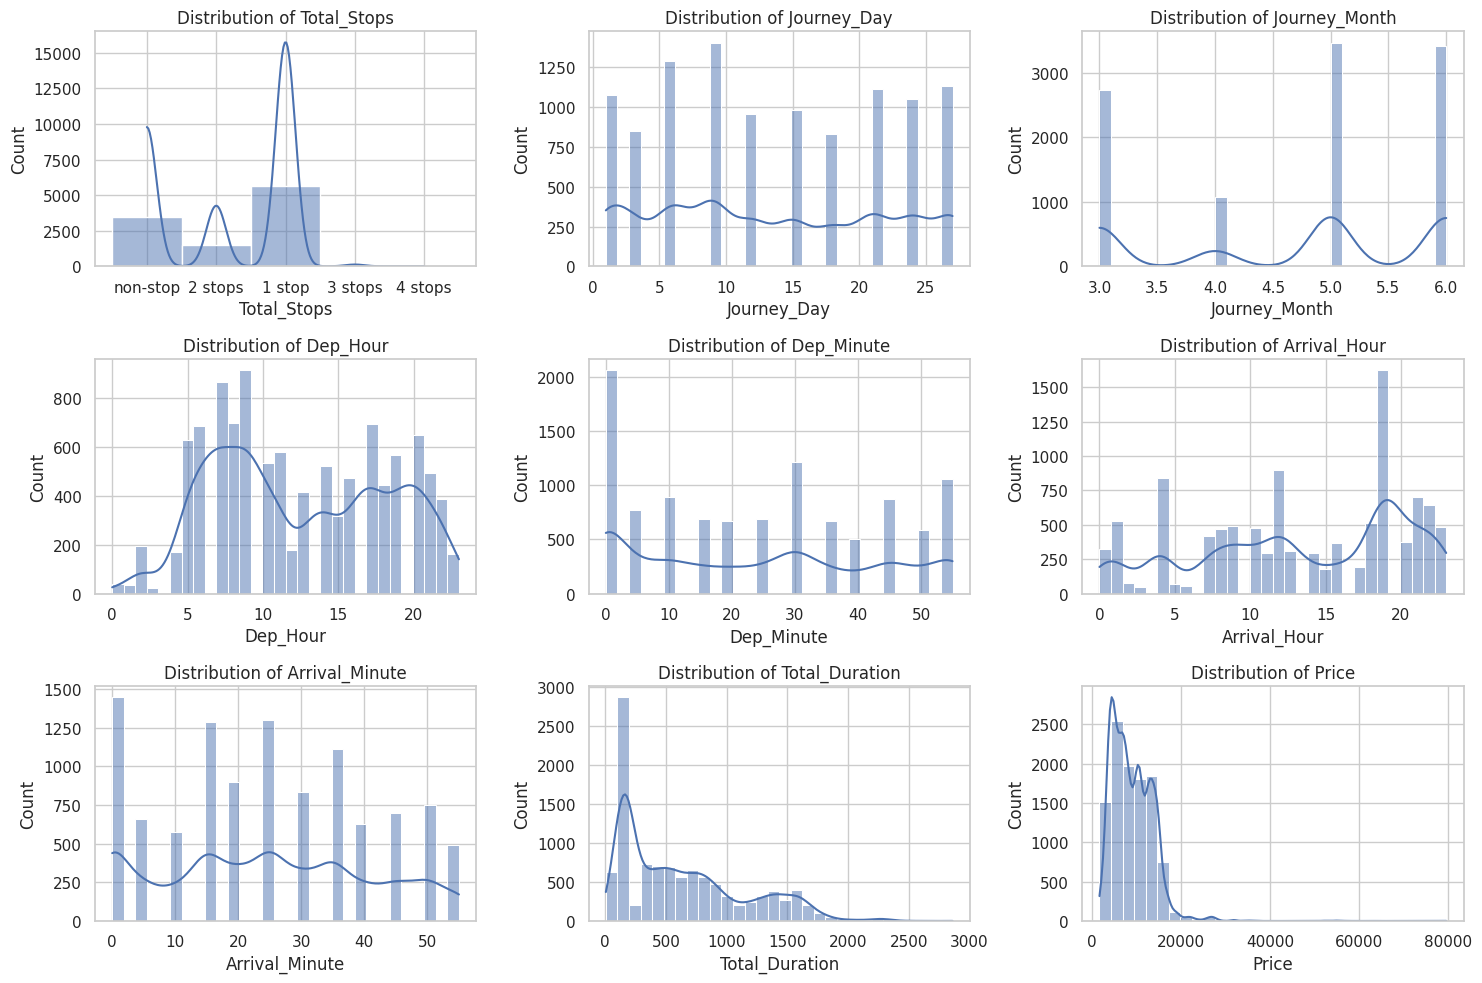

In [27]:
# Set plot style
sns.set(style="whitegrid")

# Selecting numerical features for visualization
num_features = ["Total_Stops", "Journey_Day", "Journey_Month", "Dep_Hour", "Dep_Minute",
                "Arrival_Hour", "Arrival_Minute", "Total_Duration", "Price"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


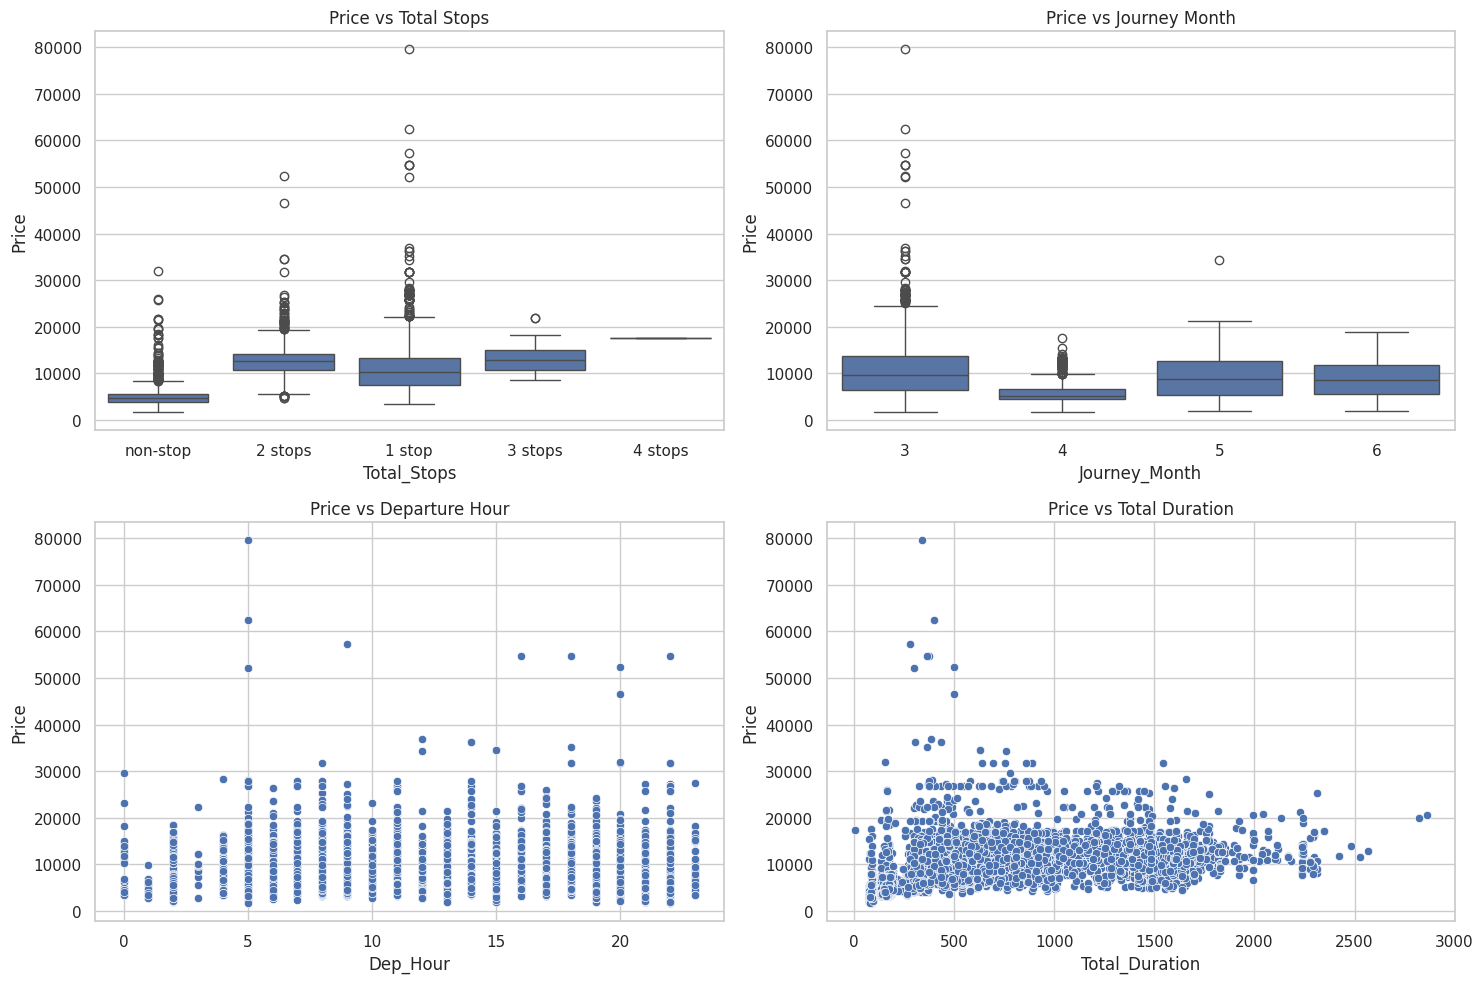

In [28]:
plt.figure(figsize=(15, 10))

# Price vs Total Stops
plt.subplot(2, 2, 1)
sns.boxplot(x=df["Total_Stops"], y=df["Price"])
plt.title("Price vs Total Stops")

# Price vs Journey Month
plt.subplot(2, 2, 2)
sns.boxplot(x=df["Journey_Month"], y=df["Price"])
plt.title("Price vs Journey Month")

# Price vs Departure Hour
plt.subplot(2, 2, 3)
sns.scatterplot(x=df["Dep_Hour"], y=df["Price"])
plt.title("Price vs Departure Hour")

# Price vs Total Duration
plt.subplot(2, 2, 4)
sns.scatterplot(x=df["Total_Duration"], y=df["Price"])
plt.title("Price vs Total Duration")

plt.tight_layout()
plt.show()


In [30]:
print(df.dtypes)


Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int32
Journey_Month       int32
Dep_Hour            int32
Dep_Minute          int32
Arrival_Hour        int32
Arrival_Minute      int32
Total_Duration      int64
dtype: object


In [31]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
label_encoders = {}
categorical_cols = ["Airline", "Source", "Destination"]

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Save encoders for future use


In [33]:
print(df.select_dtypes(include=['object']).columns)


Index(['Route', 'Total_Stops', 'Additional_Info'], dtype='object')


In [34]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use


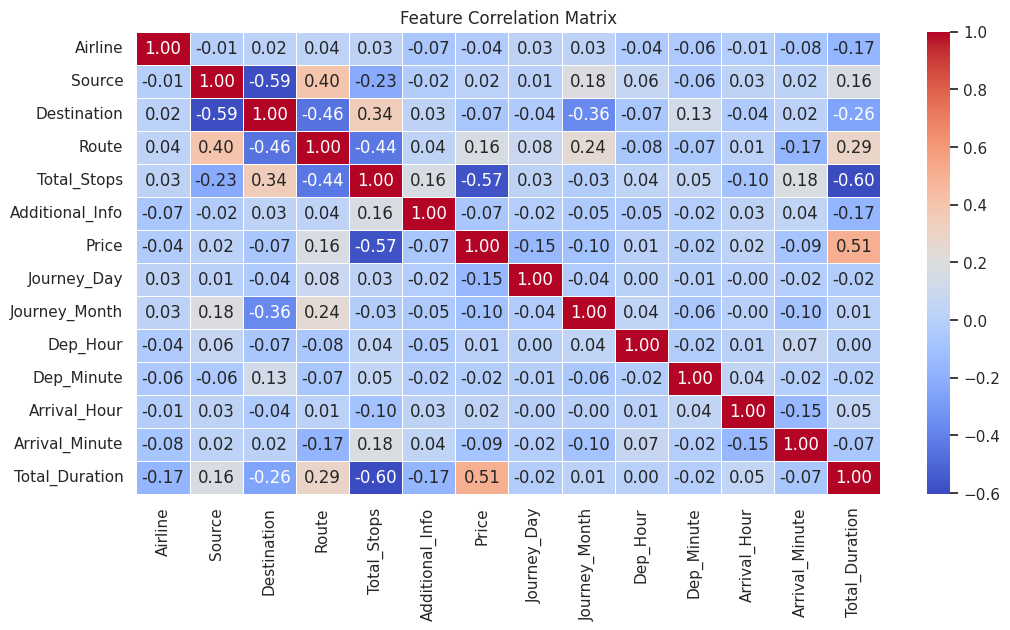

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
# Longer flights generally have higher prices,
# but some short flights are expensive due to airline choices and peak demand times.
#  The distribution of Total_Duration shows that most flights are under 6 hours,
 # with a few long-haul flights significantly impacting pricing.
 # Direct flights tend to be more expensive than flights with 1 or more stops due to convenience.
# Prices increase as the number of stops increases,
 # but the effect is not strictly linear—it also depends on the airline and route.

In [36]:
# Separate features (X) and target variable (Y)
X = df.drop(columns=["Price"])  # Features (Independent variables)
Y = df["Price"]  # Target variable (Dependent variable)


In [37]:
from sklearn.model_selection import train_test_split

# Split data: 70% Train, 20% Validation, 10% Test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.30, random_state=42)  # 30% for val+test
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)  # 10% test, 20% val

# Print shapes to verify
print(f"Train Set: {X_train.shape}, {Y_train.shape}")
print(f"Validation Set: {X_val.shape}, {Y_val.shape}")
print(f"Test Set: {X_test.shape}, {Y_test.shape}")


Train Set: (7477, 13), (7477,)
Validation Set: (2147, 13), (2147,)
Test Set: (1058, 13), (1058,)


In [39]:
# Reshape Y for compatibility with neural networks
Y_train = Y_train.values.reshape(-1, 1)
Y_val = Y_val.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

# Normalize target variable
Y_scaler = MinMaxScaler()
Y_train = Y_scaler.fit_transform(Y_train)
Y_val = Y_scaler.transform(Y_val)
Y_test = Y_scaler.transform(Y_test)


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the Neural Network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # MSE for regression


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0029 - mae: 0.0384 - val_loss: 0.0015 - val_mae: 0.0269
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014 - mae: 0.0266 - val_loss: 0.0016 - val_mae: 0.0318
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - mae: 0.0268 - val_loss: 0.0011 - val_mae: 0.0231
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - mae: 0.0250 - val_loss: 9.8933e-04 - val_mae: 0.0214
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - mae: 0.0229 - val_loss: 0.0011 - val_mae: 0.0223
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - mae: 0.0232 - val_loss: 9.8395e-04 - val_mae: 0.0221
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - mae: 0.0212 - val_loss: 9.2134e-04 - val_mae: 0.0216
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.6638e-04 - mae: 0.0213 - val_loss: 8.9320e-04 - val_mae: 0.0208
Epoch 9/100
234/234 ━━━━━━━━

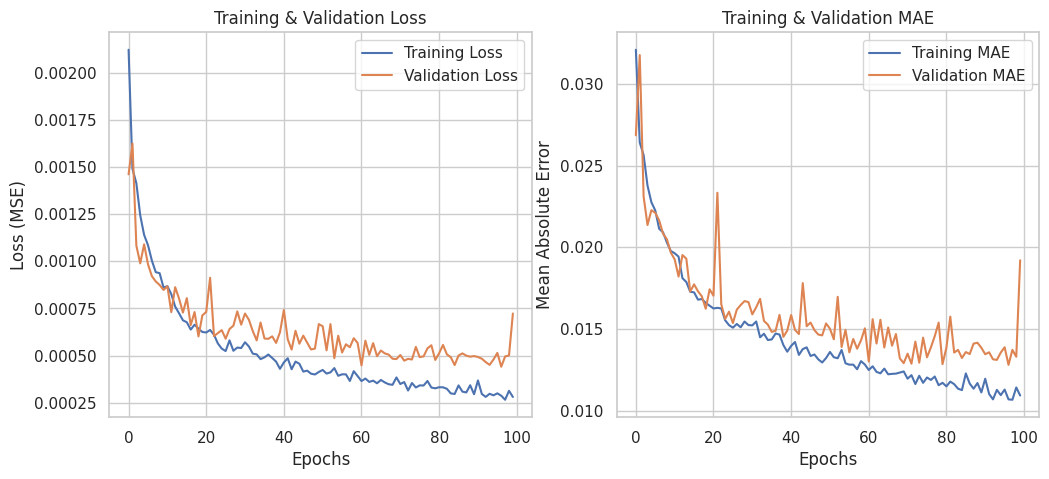

In [42]:
import matplotlib.pyplot as plt

# Extract training history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss")
plt.legend()

# Plot Accuracy (MAE for Regression)
plt.subplot(1, 2, 2)
plt.plot(mae, label="Training MAE")
plt.plot(val_mae, label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training & Validation MAE")
plt.legend()

plt.show()


In [43]:
# Updated Model with Dropout and More Neurons
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the improved model
history2 = model2.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0048 - mae: 0.0477 - val_loss: 0.0016 - val_mae: 0.0285
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0020 - mae: 0.0321 - val_loss: 0.0016 - val_mae: 0.0295
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - mae: 0.0301 - val_loss: 0.0013 - val_mae: 0.0254
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - mae: 0.0287 - val_loss: 0.0012 - val_mae: 0.0244
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - mae: 0.0275 - val_loss: 0.0011 - val_mae: 0.0228
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014 - mae: 0.0255 - val_loss: 0.0011 - val_mae: 0.0218
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - mae: 0.0248 - val_loss: 0.0010 - val_mae: 0.0213
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - mae: 0.0236 - val_loss: 0.0011 - val_mae: 0.0219
Epoch 9/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms

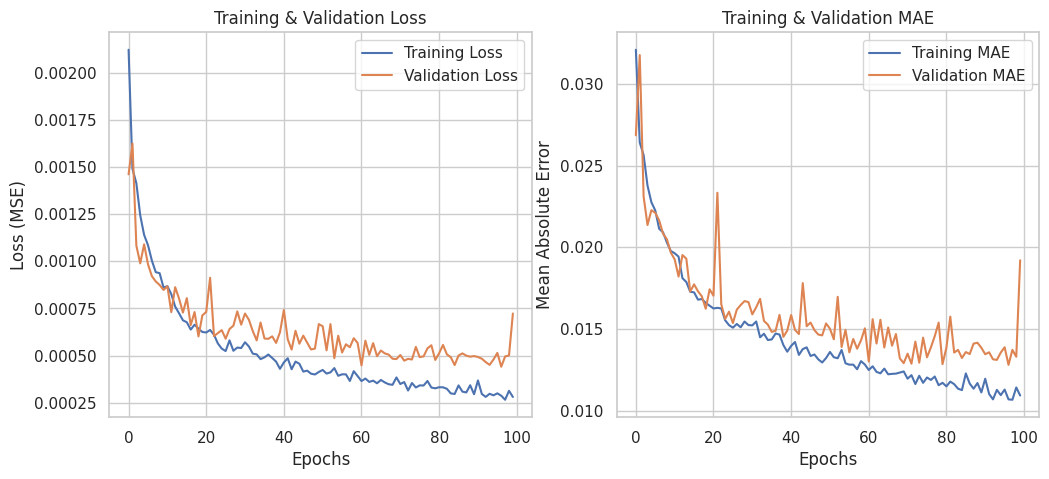

In [44]:
import matplotlib.pyplot as plt

# Extract training history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss")
plt.legend()

# Plot Accuracy (MAE for Regression)
plt.subplot(1, 2, 2)
plt.plot(mae, label="Training MAE")
plt.plot(val_mae, label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training & Validation MAE")
plt.legend()

plt.show()


In [45]:
# Updated Model with Dropout and More Neurons
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the improved model
history2 = model2.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0045 - mae: 0.0479 - val_loss: 0.0017 - val_mae: 0.0290
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0020 - mae: 0.0323 - val_loss: 0.0013 - val_mae: 0.0253
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - mae: 0.0286 - val_loss: 0.0014 - val_mae: 0.0249
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - mae: 0.0280 - val_loss: 0.0011 - val_mae: 0.0241
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0015 - mae: 0.0262 - val_loss: 0.0011 - val_mae: 0.0230
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0015 - mae: 0.0254 - val_loss: 0.0011 - val_mae: 0.0221
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - mae: 0.0245 - val_loss: 0.0011 - val_mae: 0.0236
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - mae: 0.0235 - val_loss: 8.7199e-04 - val_mae: 0.0200
Epoch 9/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s

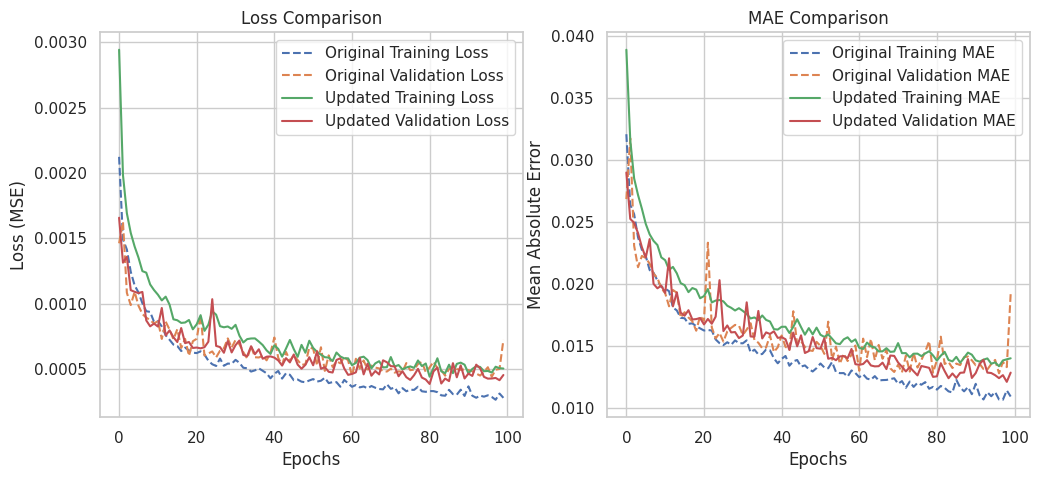

In [46]:
# Extract training history for updated model
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
mae2 = history2.history['mae']
val_mae2 = history2.history['val_mae']

# Plot Loss Comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss, label="Original Training Loss", linestyle='dashed')
plt.plot(val_loss, label="Original Validation Loss", linestyle='dashed')
plt.plot(loss2, label="Updated Training Loss")
plt.plot(val_loss2, label="Updated Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Comparison")
plt.legend()

# Plot Accuracy (MAE) Comparison
plt.subplot(1, 2, 2)
plt.plot(mae, label="Original Training MAE", linestyle='dashed')
plt.plot(val_mae, label="Original Validation MAE", linestyle='dashed')
plt.plot(mae2, label="Updated Training MAE")
plt.plot(val_mae2, label="Updated Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison")
plt.legend()

plt.show()


In [ ]:
# The updated model shows lower validation loss and MAE, indicating better generalization.
# Dropout layers reduced overfitting, improving validation performance.
# More neurons and a lower learning rate helped stabilize training.